In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('../other/frac_merge_peak.csv')

In [18]:
X = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing', u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft']]
X_primary = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Perfs/Cluster', u'Fluid_Bbls', u'Prop_Lbs']]
X_secondary = df[[u'Cluster_Spacing', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft']]
y = df[[u'OIL_Peak']]

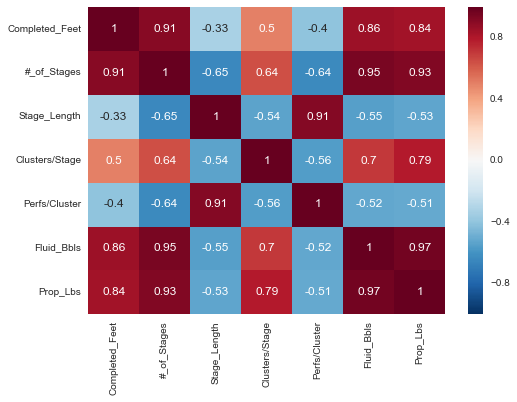

In [4]:
sns.heatmap(X_primary.corr(), annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

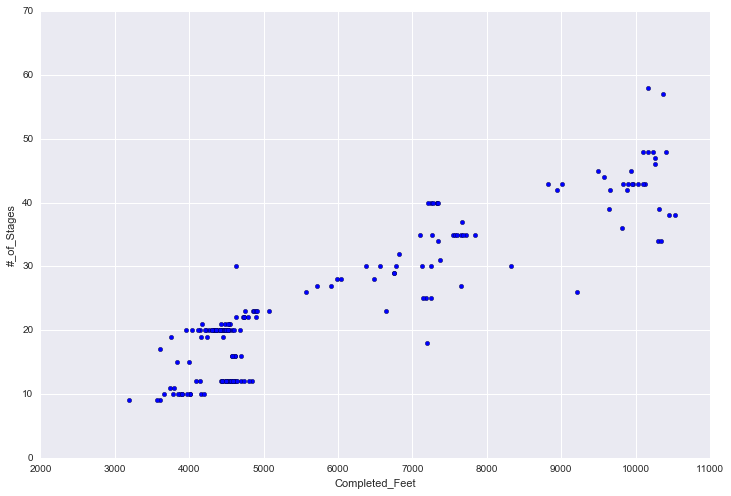

In [24]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Completed_Feet'], X['#_of_Stages'])
ax.set_xlabel('Completed_Feet')
ax.set_ylabel('#_of_Stages')

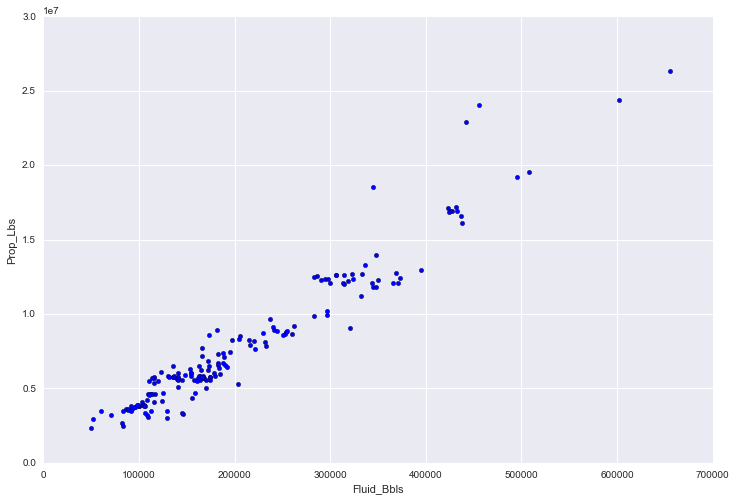

In [25]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Fluid_Bbls'], X['Prop_Lbs'])
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('Prop_Lbs')

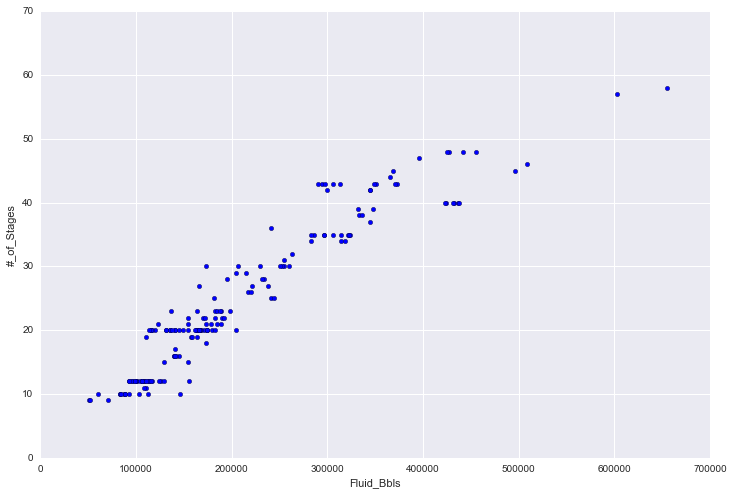

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Fluid_Bbls'], X['#_of_Stages'])
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('#_of_Stages')

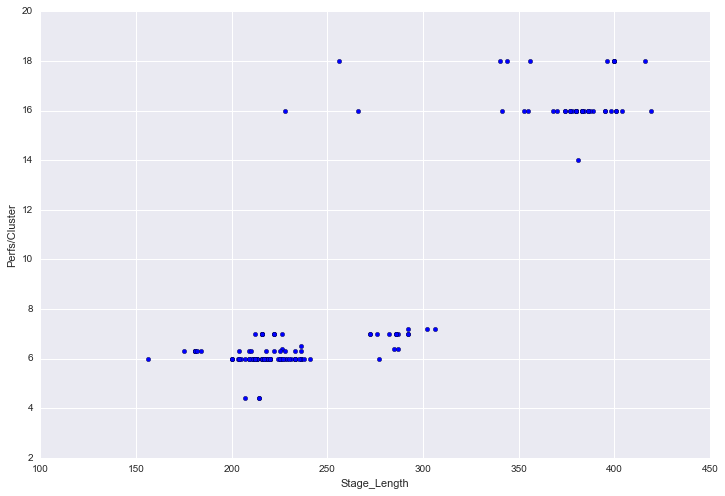

In [26]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Stage_Length'], X['Perfs/Cluster'])
ax.set_xlabel('Stage_Length')
ax.set_ylabel('Perfs/Cluster')

In [11]:
# X_mod1 = sm.add_constant(X_primary)
model = sm.OLS(y, X_primary)
model = model.fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           2.23e-82
Time:                        17:35:43   Log-Likelihood:                -1202.8
No. Observations:                 178   AIC:                             2420.
Df Residuals:                     171   BIC:                             2442.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Completed_Feet     0.0032      0.030      0.

In [20]:
# X_mod2 = sm.add_constant(X_secondary)
model = sm.OLS(y, X_secondary)
model = model.fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     7.241
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           2.51e-13
Time:                        17:43:53   Log-Likelihood:                -1187.3
No. Observations:                 178   AIC:                             2413.
Df Residuals:                     159   BIC:                             2473.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               505.9493    727.09

In [16]:
# X_mod3 = sm.add_constant(X)
model = sm.OLS(y, X)
model = model.fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     80.08
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           4.70e-75
Time:                        17:39:48   Log-Likelihood:                -1173.2
No. Observations:                 178   AIC:                             2396.
Df Residuals:                     153   BIC:                             2476.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Completed_Feet        0.0725      0.05

In [29]:
X_uncorr = df[[u'Completed_Feet', u'Stage_Length', u'Clusters/Stage',  u'Fluid_Bbls']]

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text yticklabel objects>)

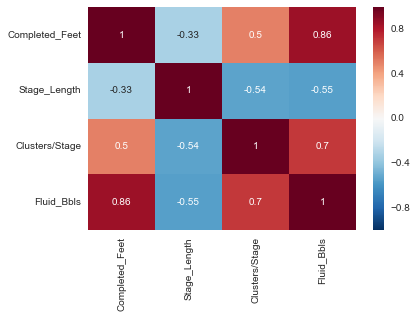

In [30]:
sns.heatmap(X_uncorr.corr(), annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [34]:
# X_mod4 = sm.add_constant(X_uncorr)
model = sm.OLS(y, X_uncorr)
model = model.fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     348.3
Date:                Wed, 02 Nov 2016   Prob (F-statistic):           6.96e-82
Time:                        18:07:53   Log-Likelihood:                -1213.0
No. Observations:                 178   AIC:                             2434.
Df Residuals:                     174   BIC:                             2447.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Completed_Feet     0.0665      0.016      4.